
# Week 1 Project — From Raw Text to Features
**Goal:** Apply tokenisation, stopword removal, lemmatization, Bag of Words, and TF‑IDF on a corpus of your choice, then compare results and reflect.


## Setup (Run this)


In [9]:

# Install & imports (safe for Colab)
!pip -q install nltk==3.9.1 scikit-learn==1.5.2 wordcloud==1.9.3

import nltk
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('gutenberg', quiet=True)
nltk.download('brown', quiet=True)
nltk.download('reuters', quiet=True)
nltk.download('movie_reviews', quiet=True)

import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import gutenberg, brown, reuters, movie_reviews, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud




## 1) Choose / Load Your Corpus
Pick **one** option below. You can also replace texts with your own.


In [10]:

# === OPTION A: Use an NLTK corpus (UNCOMMENT exactly one) ===
# doc = [" ".join(brown.words(categories='news'))[:20000]]
# docs = [" ".join(reuters.words(fileid)) for fileid in reuters.fileids()[:10]]
# docs = [" ".join(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()[:10]]
# docs = [gutenberg.raw('austen-emma.txt')[:50000]]

# === OPTION B: Paste your own documents (default placeholder) ===
# Using copy from the apple.com support pages about iPhone issues
docs = [
    "Get help if your iPhone won't turn on or if the screen is black. You might need to force your iPhone to restart or charge it. Choose your iPhone type. Force your iPhone with Face ID to restart. Press and quickly release the volume up button. Press and quickly release the volume down button. Press and hold the side button until you see the Apple logo (this might take longer than 10 seconds). If your iPhone doesn't turn on, charge your iPhone for one hour and then try again. If your iPhone shows a low-charge battery, check your iPhone hardware and then charge your iPhone for 30 minutes or until it starts. Force your iPhone with a Home button to restart. To force your iPhone to restart, you press a combination of buttons, depending on the kind of iPhone you have.",
    "Restart your iPhone. Learn how to turn your iPhone off, then back on. Press and hold either volume button and the side button until the power-off slider appears.Drag the slider, then wait 30 seconds for your device to turn off. If your device is frozen or unresponsive, force restart your device. To turn your device back on, press and hold the side button (on the right side of your iPhone) until you see the Apple logo. Press and hold the side button until the power-off slider appears. Drag the slider, then wait 30 seconds for your device to turn off. If your device is frozen or unresponsive, force restart your device. To turn your device back on, press and hold the side button until you see the Apple logo. Press and hold the top button until the power-off slider appears.",
    "Learn what to do if you don't see your device listed, you see an alert that says your device is offline, or you see an unexpected device in Find My. I don't see my device in Find My. I see my device in Find My, but it's offline. I see a device that I don’t own or use anymore. I use a device associated with a business or educational institution. I don't see my device in Find My. Make sure that you set up Find My on your device. You have to set up Find My before you can see your device in the Find My app or on iCloud.com/find. If your device is missing, learn how to mark your device as lost and protect your information. Check that you signed in to iCloud on your device using your Apple Account: Tap Settings. If you see \"Sign in to your [device],\" tap it and enter your Apple Account email address or phone number and password."
]

print(f"Loaded {len(docs)} document(s). Example preview:\n", docs[0][:300])


Loaded 3 document(s). Example preview:
 Get help if your iPhone won't turn on or if the screen is black. You might need to force your iPhone to restart or charge it. Choose your iPhone type. Force your iPhone with Face ID to restart. Press and quickly release the volume up button. Press and quickly release the volume down button. Press an



## 2) Preprocessing — **TODO: implement your pipeline**
Tokenise → lowercase → remove stopwords → lemmatize (and optionally compare stemming).


In [11]:
# === TODO 1: Build your preprocessing function ===
# Hints:
# - tokens = word_tokenize(text)
# - tokens = [t.lower() for t in tokens if t.isalpha()]
# - remove stopwords via nltk.corpus.stopwords
# - lemmatize with WordNetLemmatizer()
# (Optional) Compare with PorterStemmer()

#from typing import List

def my_preprocess(text: str, remove_stop: bool = True, lemmatize: bool = True, stem: bool = False) -> str:
    # Split into tokens (mostly words)
    tokens = word_tokenize(text)
    # IF it's a word, make lowercase
    tokens = [t.lower() for t in tokens if t.isalpha()]
    if remove_stop:
        stop_words = set(stopwords.words("english"))
        # Check each token against stop words
        tokens = [t for t in tokens if t not in stop_words]
    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(t) for t in tokens]
    if stem:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(t) for t in tokens]
    return " ".join(tokens)

    

docs_clean = [my_preprocess(d) for d in docs]
print(docs_clean[0][:200])
docs_clean_stemmed = [my_preprocess(d, lemmatize=False, stem=True) for d in docs]
print(docs_clean_stemmed[0][:200])

get help iphone wo turn screen black might need force iphone restart charge choose iphone type force iphone face id restart press quickly release volume button press quickly release volume button pres
get help iphon wo turn screen black might need forc iphon restart charg choos iphon type forc iphon face id restart press quickli releas volum button press quickli releas volum button press hold side 


**Reflection**
I understand most tools work fine for English, but it would also be interesting to understand from the start how to deal with other languages. 

###  Quick Word Cloud

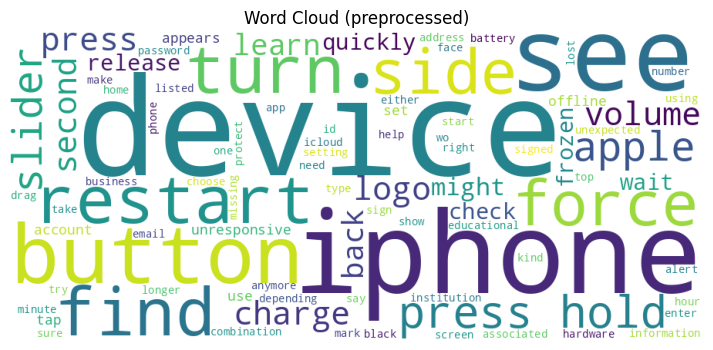

In [12]:

try:
    wc = WordCloud(width=900, height=400, background_color="white").generate(" ".join(docs_clean))
    plt.figure(figsize=(10,4))
    plt.imshow(wc); plt.axis("off")
    plt.title("Word Cloud (preprocessed)")
    plt.show()
except Exception as e:
    print("WordCloud skipped:", e)


## 3) Bag of Words — **TODO** build and inspect top words

In [13]:

# === TODO 2: Create a Bag of Words vectorizer and fit ===
# Hint: CountVectorizer(max_features=2000, ngram_range=(1,1))
# Create the vectorizer: Maximum 2000 features, which in this case equals max. 2,000 tokens, because we only use unigrams (1,1)
# cf. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
bow_vec = CountVectorizer(max_features=2000, ngram_range=(1,1))
# Fit and transform the document (CountVectorizer does a lot of cleaning itself, but does not lemmatise or remove stop words, hence i need to use the preprocessed doc)
X_bow = bow_vec.fit_transform(docs_clean)
# This is where the lexicon is:
# print(bow_vec.get_feature_names_out())
# get the 10 top rated terms and their counts
# Calculate term frequencies into a sum array
# X_bow has a row per document and a column per token, so has the same indices as bow_vec.get_feature_names_out()
bow_sum = np.array(X_bow.sum(axis=0)).flatten()
# Get indices of the top 10 terms (in the correct order) 
# ie. sort the sum array, take the last 10 indices, and reverse them to get descending order
bow_indices = np.argsort(bow_sum)[-10:][::-1]
top_terms = []
top_counts = []
print("Top 10 Bag of Words terms:")
for idx in bow_indices:
    top_terms.append(bow_vec.get_feature_names_out()[idx])
    top_counts.append(bow_sum[idx])
    print(f"  {bow_vec.get_feature_names_out()[idx]}: {bow_sum[idx]}")




Top 10 Bag of Words terms:
  device: 22
  iphone: 15
  see: 12
  button: 11
  press: 9
  restart: 7
  turn: 7
  find: 7
  hold: 6
  side: 6


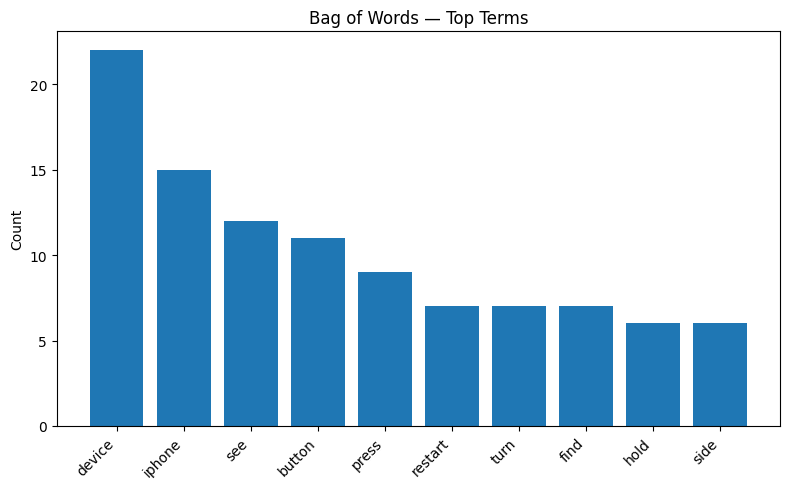

In [14]:

# Plot top BoW terms
plt.figure(figsize=(8,5))
plt.bar(top_terms, top_counts)
plt.title("Bag of Words — Top Terms")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


**Reflection**

Bag of Words counts the tokens (words) in the lexicon across the entire corpus, i.e. in my case of my 3 documents. 
So e.g. iPhone appears 15 times across the three documents. 

## 4) TF‑IDF — **TODO** build and inspect top weighted words

In [15]:

# === TODO 3: Create a TF-IDF vectorizer and fit ===
# Hint: TfidfVectorizer(max_features=2000, ngram_range=(1,1))
# cf. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfidf_vec = TfidfVectorizer(max_features=2000, ngram_range=(1,1))
X_tfidf = tfidf_vec.fit_transform(docs_clean)


# Retrieve 10 top TF-IDF terms
tfidf_sum = np.array(X_tfidf.sum(axis=0)).flatten()
tfidf_indices = np.argsort(tfidf_sum)[-10:][::-1]
top_tfidf_terms = []
top_tfidf_scores = []
print("Top 10 TF-IDF terms:")
for idx in tfidf_indices:
    top_tfidf_terms.append(tfidf_vec.get_feature_names_out()[idx])
    top_tfidf_scores.append(tfidf_sum[idx])
    print(f"  {tfidf_vec.get_feature_names_out()[idx]}: {tfidf_sum[idx]:.4f}")  


# I understand that TF-IDF is more meaningful document-specific, so I now get the top terms for a specific document
# Get the TF-IDF vector for the 2nd document (index 1)
doc_index = 1
doc_tfidf = X_tfidf[doc_index].toarray().flatten() 
# Get indices of top 10 terms for this document
tfidf_indices = np.argsort(doc_tfidf)[-10:][::-1]
top_tfidf_terms_doc = []
top_tfidf_scores_doc = []
print("\nTop 10 TF-IDF terms in the 2nd document:")
for idx in tfidf_indices:
    top_tfidf_terms_doc.append(tfidf_vec.get_feature_names_out()[idx])
    top_tfidf_scores_doc.append(doc_tfidf[idx])
    print(f"  {tfidf_vec.get_feature_names_out()[idx]}: {doc_tfidf[idx]:.4f}")



Top 10 TF-IDF terms:
  device: 1.1234
  iphone: 0.8477
  button: 0.6146
  press: 0.5027
  see: 0.4707
  find: 0.4491
  restart: 0.3926
  turn: 0.3889
  slider: 0.3618
  force: 0.3376

Top 10 TF-IDF terms in the 2nd document:
  device: 0.4403
  slider: 0.3618
  button: 0.3302
  side: 0.2752
  press: 0.2752
  hold: 0.2752
  turn: 0.2752
  back: 0.2171
  restart: 0.1651
  iphone: 0.1651


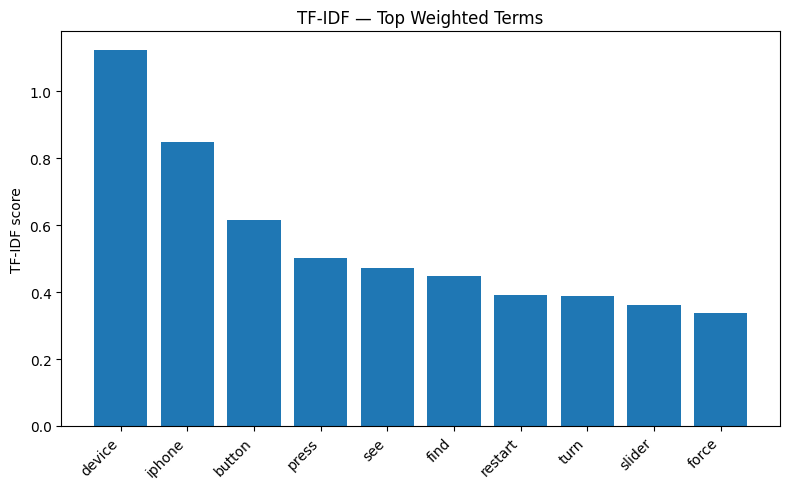

In [16]:

# Plot top TF‑IDF terms
plt.figure(figsize=(8,5))
plt.bar(top_tfidf_terms, top_tfidf_scores)
plt.title("TF‑IDF — Top Weighted Terms")
plt.xticks(rotation=45, ha="right")
plt.ylabel("TF‑IDF score")
plt.tight_layout()
plt.show()


**Reflection**

The TF-IDF values aggregated across the corpus show the relative "document specificity" of a word when compared to the ranking in the BoW model. For example, the TF-IDF sum of "button" is higher than that of "see" across all documents, although it appears less frequent (cf. BoW). That means that "see" probably appears more evenly across all documents, while "button" appears more concentrated in specific documents. 

The TF-IDF ranking for document number 2 shows that  "slider" is a significant word based on the TF-IDF value. Significant means that "slider" appears with higher density in this document compared to the entire corpus. 

Reference: Lane, Dyshel (2025): *Natural Language Processing in Action.* 2nd ed. Manning. - Chapter 3, pp. 89–133, and in particular chapter 3.6 *Inverse document frequency,* pp. 121–124.


## Submission Checklist
- [ ] Notebook runs end-to-end  
- [ ] Preprocessing function implemented by you  
- [ ] BoW top terms + plot  
- [ ] TF‑IDF top terms + plot  
